In [19]:
# Xin quyen Google drive
from google.colab import drive
drive.mount('/content/ggdrive')

Drive already mounted at /content/ggdrive; to attempt to forcibly remount, call drive.mount("/content/ggdrive", force_remount=True).


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/ggdrive/MyDrive/Phân tích hiệu suất kinh doanh TIMA/test2.csv")

In [21]:
#2. Phân tích ảnh hưởng của "Giới tính" tới "Số tiền vay"
# Nhóm theo cột 'Gender' và tính trung bình cột 'Số tiền đăng ký vay ban đầu'
loan_by_gender = df.groupby('Gender')['Số tiền đăng ký vay ban đầu'].mean()

# In kết quả
print("Số tiền vay trung bình theo giới tính:")
print(loan_by_gender)

Số tiền vay trung bình theo giới tính:
Gender
0    1.373141e+07
1    1.118953e+07
Name: Số tiền đăng ký vay ban đầu, dtype: float64


Hệ số tương quan giữa Tuổi và Tiền giải ngân: 0.050862952217213896


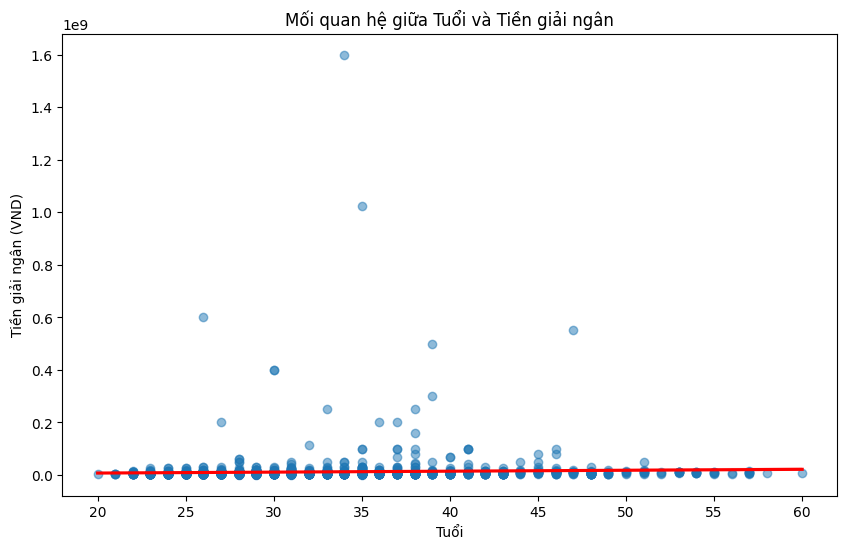

In [22]:
#3. Phân tích sự ảnh hưởng của "Tuổi" đối với "Tiền giải ngân"
# Làm sạch dữ liệu: Chuyển cột 'Age' thành số, bỏ qua các giá trị 'Unknown'
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Age', 'Tiền giải ngân'])

# Tính hệ số tương quan giữa 'Age' và 'Tiền giải ngân'
correlation = df['Age'].corr(df['Tiền giải ngân'])
print(f"Hệ số tương quan giữa Tuổi và Tiền giải ngân: {correlation}")

# Vẽ đồ thị hồi quy bằng sns.regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Tiền giải ngân', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Mối quan hệ giữa Tuổi và Tiền giải ngân')
plt.xlabel('Tuổi')
plt.ylabel('Tiền giải ngân (VND)')
plt.show()

Hệ số tương quan giữa Thời gian đã sống và Điểm tín dụng: -0.1217300922566693


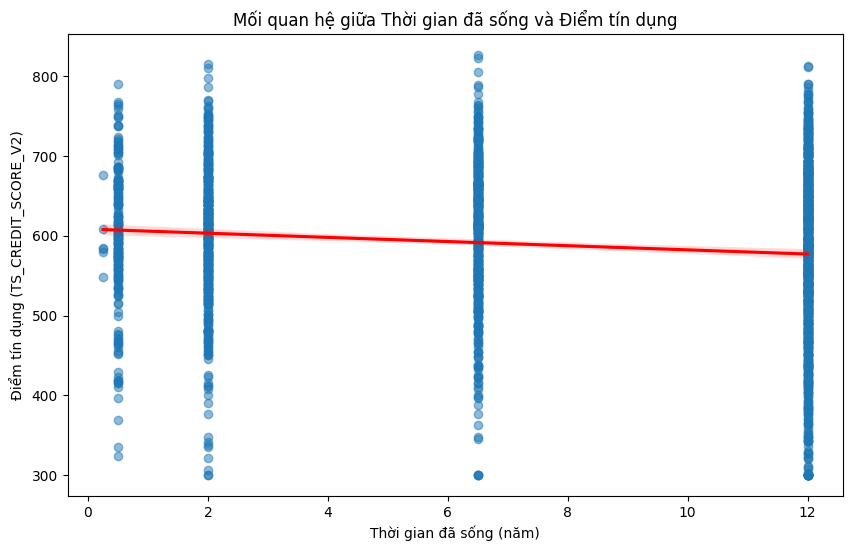

In [23]:
#5. Kiểm tra sự ảnh hưởng của "Thời gian đã sống" tới "Điểm tín dụng"
# Chuyển đổi cột "Thời gian đã sống" thành giá trị số
def convert_living_time(time_str):
    if pd.isna(time_str):
        return None
    time_map = {
        'Dưới 1 năm': 0.5,
        'Dưới 6 tháng': 0.25,
        '1 - 3 năm': 2,
        '3 - 10 năm': 6.5,
        'Hơn 10 năm': 12
    }
    return time_map.get(time_str, None)

df['Thời gian đã sống (năm)'] = df['Thời gian đã sống'].apply(convert_living_time)
df = df.dropna(subset=['Thời gian đã sống (năm)', 'TS_CREDIT_SCORE_V2'])

# Tính hệ số tương quan giữa "Thời gian đã sống" và "Điểm tín dụng"
correlation = df['Thời gian đã sống (năm)'].corr(df['TS_CREDIT_SCORE_V2'])
print(f"Hệ số tương quan giữa Thời gian đã sống và Điểm tín dụng: {correlation}")

# Vẽ đồ thị hồi quy bằng sns.regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='Thời gian đã sống (năm)', y='TS_CREDIT_SCORE_V2', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Mối quan hệ giữa Thời gian đã sống và Điểm tín dụng')
plt.xlabel('Thời gian đã sống (năm)')
plt.ylabel('Điểm tín dụng (TS_CREDIT_SCORE_V2)')
plt.show()

In [24]:
#6. Xác định mối quan hệ giữa "Khu vực" và "Tỷ lệ nợ xấu"
# Nhóm theo 'Khu vực' và tính trung bình của cột 'HasBadDebt' (0 hoặc 1)
debt_ratio_by_region = df.groupby('CityName')['HasBadDebt'].mean() * 100

# In kết quả
print("Tỷ lệ nợ xấu (%) theo khu vực:")
print(debt_ratio_by_region)

Tỷ lệ nợ xấu (%) theo khu vực:
CityName
Bắc Ninh         0.000000
Hà Nội          18.076721
Hòa Bình        16.666667
Hải Dương        0.000000
Hải Phòng        0.000000
Hồ Chí Minh     16.140351
Lào Cai        100.000000
Phú Thọ         22.222222
Thanh Hóa      100.000000
Vĩnh Phúc       50.000000
Name: HasBadDebt, dtype: float64


Hệ số tương quan giữa Số tiền vay và Nợ xấu: -0.04528476249830402


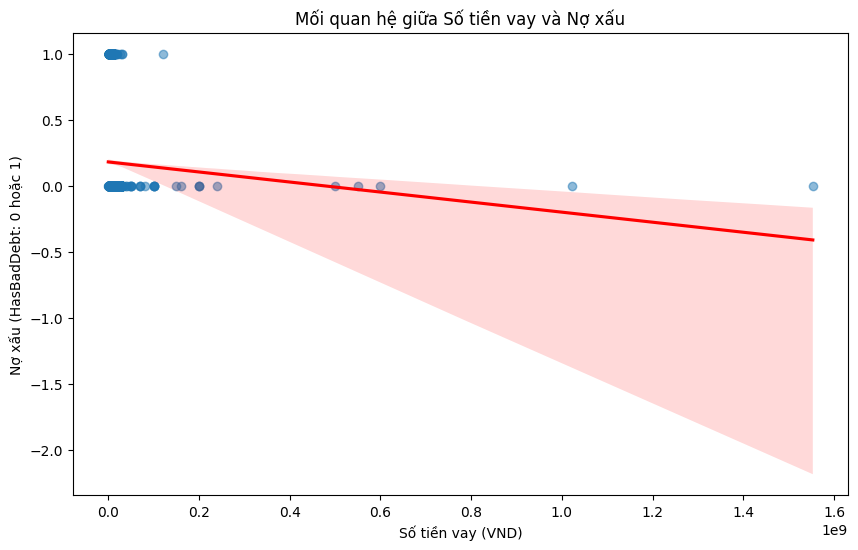

In [25]:
#8. Tìm hiểu ảnh hưởng của "Số tiền vay" đến "Nợ xấu"
# Làm sạch dữ liệu: Chuyển cột 'Số tiền đăng ký vay ban đầu' thành số và loại bỏ giá trị thiếu
df['Số tiền vay'] = pd.to_numeric(df['Số tiền đăng ký vay ban đầu'], errors='coerce')
df = df.dropna(subset=['Số tiền vay', 'HasBadDebt'])

# Tính hệ số tương quan giữa 'Số tiền vay' và 'HasBadDebt'
correlation = df['Số tiền vay'].corr(df['HasBadDebt'])
print(f"Hệ số tương quan giữa Số tiền vay và Nợ xấu: {correlation}")

# Vẽ đồ thị hồi quy bằng sns.regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='Số tiền vay', y='HasBadDebt', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Mối quan hệ giữa Số tiền vay và Nợ xấu')
plt.xlabel('Số tiền vay (VND)')
plt.ylabel('Nợ xấu (HasBadDebt: 0 hoặc 1)')
plt.show()

Hệ số tương quan giữa Thu nhập và Số tiền vay: 0.0771882509614252


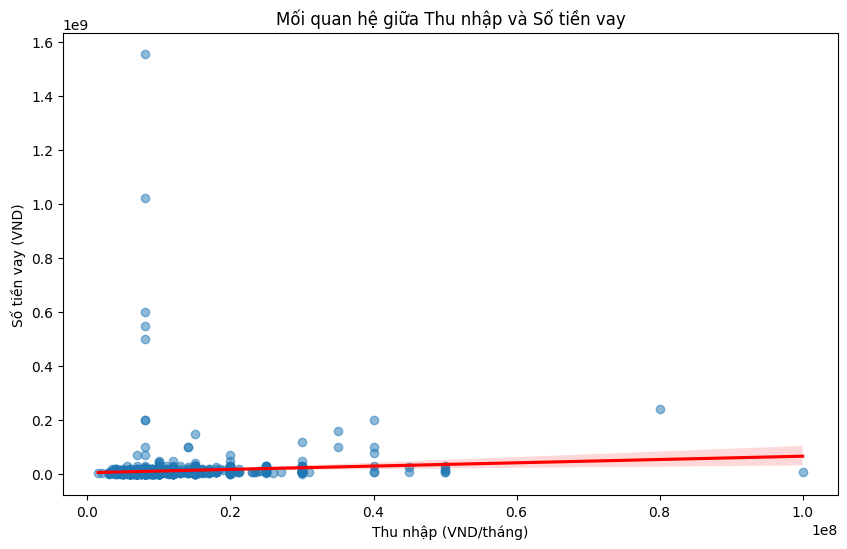

In [26]:
#9. Kiểm tra mối quan hệ giữa "Thu nhập" và "Số tiền vay"
# Làm sạch dữ liệu: Chuyển cột 'Salary' và 'Số tiền đăng ký vay ban đầu' thành số và loại bỏ giá trị thiếu
df['Thu nhập'] = pd.to_numeric(df['Salary'], errors='coerce')
df['Số tiền vay'] = pd.to_numeric(df['Số tiền đăng ký vay ban đầu'], errors='coerce')
df = df.dropna(subset=['Thu nhập', 'Số tiền vay'])

# Tính hệ số tương quan giữa 'Thu nhập' và 'Số tiền vay'
correlation = df['Thu nhập'].corr(df['Số tiền vay'])
print(f"Hệ số tương quan giữa Thu nhập và Số tiền vay: {correlation}")

# Vẽ đồ thị hồi quy bằng sns.regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='Thu nhập', y='Số tiền vay', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Mối quan hệ giữa Thu nhập và Số tiền vay')
plt.xlabel('Thu nhập (VND/tháng)')
plt.ylabel('Số tiền vay (VND)')
plt.show()

Hệ số tương quan giữa Điểm tín dụng và Thu nhập: 0.08680005865652399


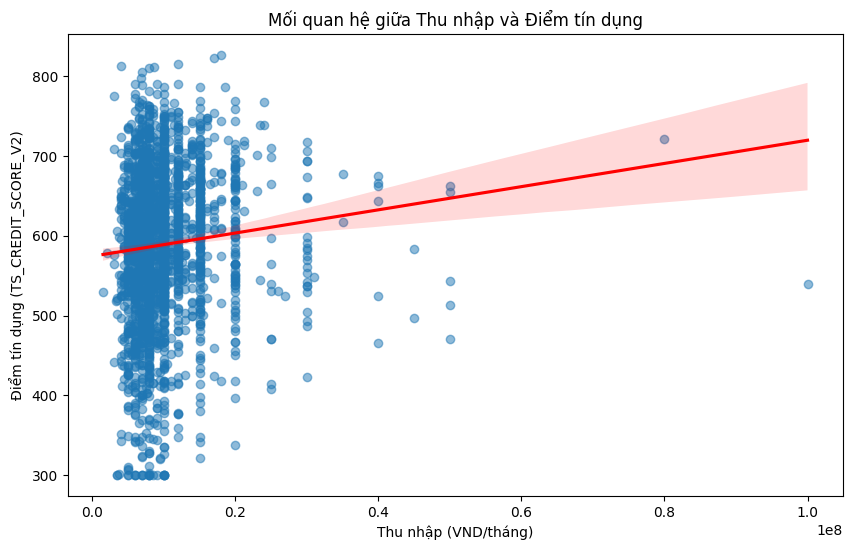

In [27]:
#10. Phân tích mối quan hệ giữa "Điểm tín dụng" và "Thu nhập"
# Làm sạch dữ liệu: Chuyển cột 'Salary' và 'TS_CREDIT_SCORE_V2' thành số và loại bỏ giá trị thiếu
df['Thu nhập'] = pd.to_numeric(df['Salary'], errors='coerce')
df['Điểm tín dụng'] = pd.to_numeric(df['TS_CREDIT_SCORE_V2'], errors='coerce')
df = df.dropna(subset=['Thu nhập', 'Điểm tín dụng'])

# Tính hệ số tương quan giữa 'Điểm tín dụng' và 'Thu nhập'
correlation = df['Điểm tín dụng'].corr(df['Thu nhập'])
print(f"Hệ số tương quan giữa Điểm tín dụng và Thu nhập: {correlation}")

# Vẽ đồ thị hồi quy bằng sns.regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='Thu nhập', y='Điểm tín dụng', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Mối quan hệ giữa Thu nhập và Điểm tín dụng')
plt.xlabel('Thu nhập (VND/tháng)')
plt.ylabel('Điểm tín dụng (TS_CREDIT_SCORE_V2)')
plt.show()

In [28]:
#11. Phân tích ảnh hưởng của "Thành phố" tới "Số tiền vay"
# Làm sạch dữ liệu: Chuyển cột 'Số tiền đăng ký vay ban đầu' thành số và loại bỏ giá trị thiếu
df['Số tiền vay'] = pd.to_numeric(df['Số tiền đăng ký vay ban đầu'], errors='coerce')
df = df.dropna(subset=['Số tiền vay', 'CityName'])

# Nhóm theo 'CityName' và tính trung bình của 'Số tiền vay'
mean_loan_by_city = df.groupby('CityName')['Số tiền vay'].mean()

# In kết quả
print("Số tiền vay trung bình (VND) theo thành phố:")
print(mean_loan_by_city)

Số tiền vay trung bình (VND) theo thành phố:
CityName
Bắc Ninh       8.000000e+06
Hà Nội         1.233917e+07
Hòa Bình       8.333333e+06
Hải Dương      1.000000e+07
Hải Phòng      4.000000e+06
Hồ Chí Minh    9.470175e+06
Lào Cai        1.000000e+07
Phú Thọ        9.111111e+06
Thanh Hóa      7.500000e+06
Vĩnh Phúc      7.500000e+06
Name: Số tiền vay, dtype: float64


Hệ số tương quan giữa Mức lương và Số tiền vay: 0.0771882509614252


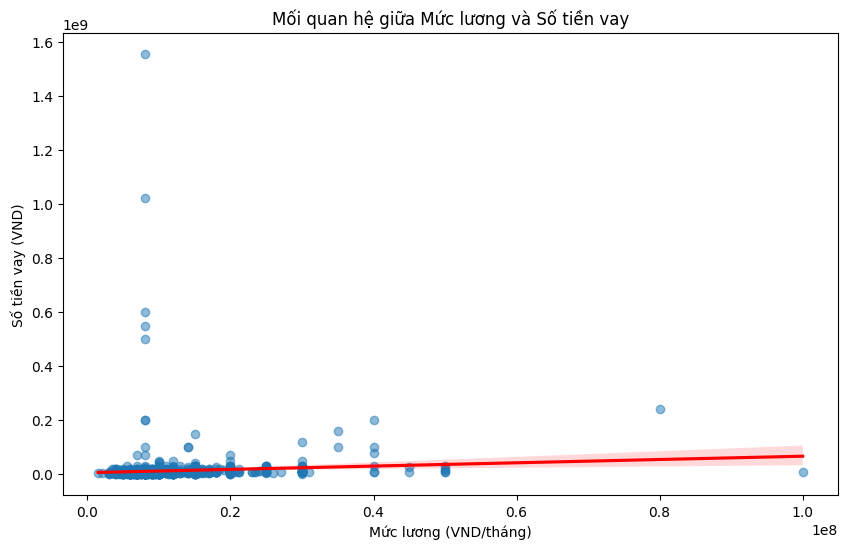

In [29]:
#13. Kiểm tra sự thay đổi "Số tiền vay" theo "Mức lương"
# Làm sạch dữ liệu: Chuyển cột 'Salary' và 'Số tiền đăng ký vay ban đầu' thành số và loại bỏ giá trị thiếu
df['Mức lương'] = pd.to_numeric(df['Salary'], errors='coerce')
df['Số tiền vay'] = pd.to_numeric(df['Số tiền đăng ký vay ban đầu'], errors='coerce')
df = df.dropna(subset=['Mức lương', 'Số tiền vay'])

# Định nghĩa các ngưỡng để chia mức lương (đơn vị: VND/tháng)
bins = [0, 5000000, 10000000, 20000000, float('inf')]  # Các ngưỡng: <5M, 5M-10M, 10M-20M, >20M
labels = ['<5 triệu', '5-10 triệu', '10-20 triệu', '>20 triệu']

# Chia cột 'Mức lương' thành các mức
df['Mức lương phân loại'] = pd.cut(df['Mức lương'], bins=bins, labels=labels, include_lowest=True)

# Tính hệ số tương quan giữa 'Mức lương' và 'Số tiền vay'
correlation = df['Mức lương'].corr(df['Số tiền vay'])
print(f"Hệ số tương quan giữa Mức lương và Số tiền vay: {correlation}")

# Vẽ đồ thị hồi quy bằng sns.regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='Mức lương', y='Số tiền vay', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Mối quan hệ giữa Mức lương và Số tiền vay')
plt.xlabel('Mức lương (VND/tháng)')
plt.ylabel('Số tiền vay (VND)')
plt.show()

In [30]:
#14. Phân tích ảnh hưởng của "Job Name" đến "Tiền vay"
# Làm sạch dữ liệu: Chuyển cột 'Số tiền đăng ký vay ban đầu' thành số và loại bỏ giá trị thiếu
df['Tiền vay'] = pd.to_numeric(df['Số tiền đăng ký vay ban đầu'], errors='coerce')
df = df.dropna(subset=['Tiền vay', 'JobName'])

# Nhóm theo 'JobName' và tính trung bình của 'Tiền vay'
mean_loan_by_job = df.groupby('JobName')['Tiền vay'].mean()

# Lấy 5 nghề nghiệp có trung bình số tiền vay cao nhất
top_5_jobs = mean_loan_by_job.nlargest(5)

# In kết quả
print("Top 5 nghề nghiệp có trung bình số tiền vay cao nhất (VND):")
print(top_5_jobs)

Top 5 nghề nghiệp có trung bình số tiền vay cao nhất (VND):
JobName
Giảng viên                                   6.750000e+07
Tự doanh có ĐKKD                             5.975000e+07
Unknown                                      3.217309e+07
Công việc ko ổn định/Thu nhập thất thường    2.000000e+07
Nhân viên tổ chức nhà nước                   1.893333e+07
Name: Tiền vay, dtype: float64


Hệ số tương quan giữa Thời gian sống và Điểm tín dụng: -0.1217300922566693


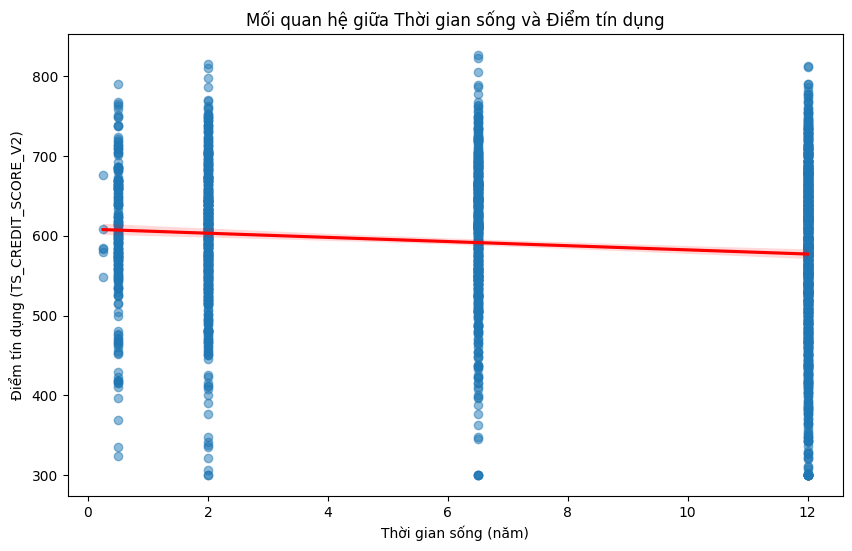

In [31]:
#16. Phân tích sự ảnh hưởng của "Thời gian sống" tới "Điểm tín dụng"
# Hàm chuyển đổi 'Thời gian đã sống' thành giá trị số (năm)
def convert_living_time(time_str):
    if pd.isna(time_str):
        return None
    time_map = {
        'Dưới 1 năm': 0.5,
        'Dưới 6 tháng': 0.25,
        '1 - 3 năm': 2,
        '3 - 10 năm': 6.5,
        'Hơn 10 năm': 12
    }
    return time_map.get(time_str, None)

# Áp dụng chuyển đổi và làm sạch dữ liệu
df['Thời gian sống (năm)'] = df['Thời gian đã sống'].apply(convert_living_time)
df['Điểm tín dụng'] = pd.to_numeric(df['TS_CREDIT_SCORE_V2'], errors='coerce')
df = df.dropna(subset=['Thời gian sống (năm)', 'Điểm tín dụng'])

# Tính hệ số tương quan giữa 'Thời gian sống (năm)' và 'Điểm tín dụng'
correlation = df['Thời gian sống (năm)'].corr(df['Điểm tín dụng'])
print(f"Hệ số tương quan giữa Thời gian sống và Điểm tín dụng: {correlation}")

# Vẽ đồ thị hồi quy bằng sns.regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='Thời gian sống (năm)', y='Điểm tín dụng', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Mối quan hệ giữa Thời gian sống và Điểm tín dụng')
plt.xlabel('Thời gian sống (năm)')
plt.ylabel('Điểm tín dụng (TS_CREDIT_SCORE_V2)')
plt.show()

Hệ số tương quan giữa Số tiền vay và Số ngày quá hạn: 0.0020866985045696917


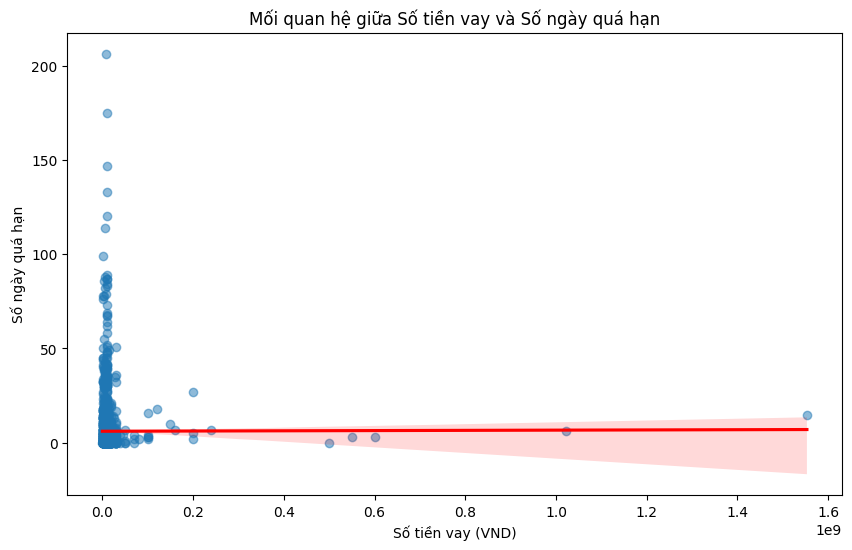

In [32]:
#18. Phân tích mối quan hệ giữa "Số tiền vay" và "Số ngày quá hạn"
# Làm sạch dữ liệu: Chuyển cột 'Số tiền đăng ký vay ban đầu' và 'LongestOverdue' thành số và loại bỏ giá trị thiếu
df['Số tiền vay'] = pd.to_numeric(df['Số tiền đăng ký vay ban đầu'], errors='coerce')
df['Số ngày quá hạn'] = pd.to_numeric(df['LongestOverdue'], errors='coerce')
df = df.dropna(subset=['Số tiền vay', 'Số ngày quá hạn'])

# Tính hệ số tương quan giữa 'Số tiền vay' và 'Số lần quá hạn'
correlation = df['Số tiền vay'].corr(df['Số ngày quá hạn'])
print(f"Hệ số tương quan giữa Số tiền vay và Số ngày quá hạn: {correlation}")

# Vẽ đồ thị hồi quy bằng sns.regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='Số tiền vay', y='Số ngày quá hạn', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Mối quan hệ giữa Số tiền vay và Số ngày quá hạn')
plt.xlabel('Số tiền vay (VND)')
plt.ylabel('Số ngày quá hạn')
plt.show()

In [37]:
#19. Phân tích sự ảnh hưởng của "Công ty" tới "Khoản vay"
# Làm sạch dữ liệu: Chuyển cột 'Số tiền đăng ký vay ban đầu' thành số và loại bỏ giá trị thiếu
df['Khoản vay'] = pd.to_numeric(df['Số tiền đăng ký vay ban đầu'], errors='coerce')
df = df.dropna(subset=['Khoản vay', 'NameCompany'])

# Nhóm theo 'CompanyName' và tính trung bình của 'Khoản vay'
mean_loan_by_company = df.groupby('NameCompany')['Khoản vay'].mean()

# Lấy 5 công ty có trung bình số tiền vay cao nhất
top_5_company = mean_loan_by_company.nlargest(5)

# In kết quả
print("Top 5 công ty có trung bình số tiền vay cao nhất (VND):")
print(top_5_company)

Top 5 công ty có trung bình số tiền vay cao nhất (VND):
NameCompany
Công ty cổ phần quy hoạch kiến trúc và đầu đầu tư xây dựng hà nội    600000000.0
bệnh viện việt xô                                                    550000000.0
Công Ty CPĐT Phát Triển Mộc Lâm Gia                                  500000000.0
Cty TNHH TM XNK Hùng Huy                                             240000000.0
Công ty cổ phần quảng cáo và nội thất Hoàng Đại Phát       200000000.0
Name: Khoản vay, dtype: float64


Hệ số tương quan giữa Thu nhập và Số ngày trễ hạn: -0.035543388416811685


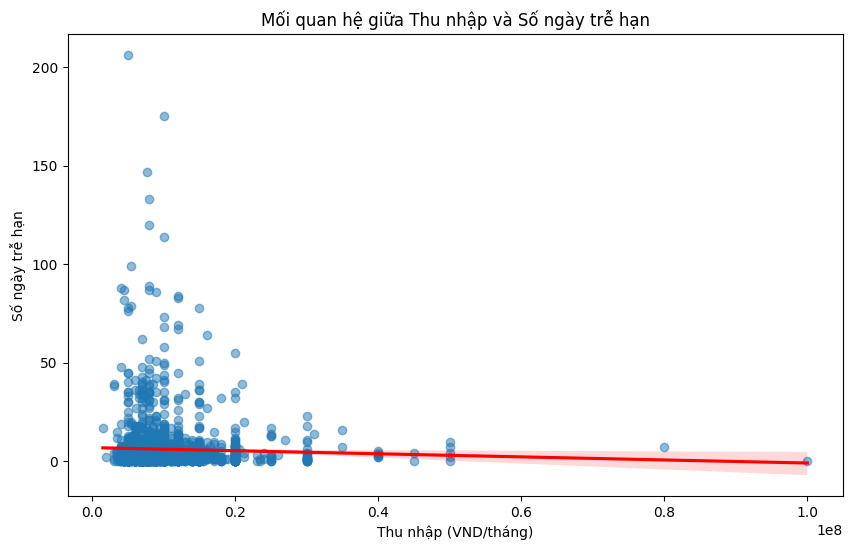

In [34]:
#21. Kiểm tra mối quan hệ giữa "Thu nhập" và "Số ngày trễ hạn"
# Làm sạch dữ liệu: Chuyển cột 'Salary' và 'LongestOverdue' thành số và loại bỏ giá trị thiếu
df['Thu nhập'] = pd.to_numeric(df['Salary'], errors='coerce')
df['Số ngày trễ hạn'] = pd.to_numeric(df['LongestOverdue'], errors='coerce')
df = df.dropna(subset=['Thu nhập', 'Số ngày trễ hạn'])

# Tính hệ số tương quan giữa 'Thu nhập' và 'Số lần trễ hạn'
correlation = df['Thu nhập'].corr(df['Số ngày trễ hạn'])
print(f"Hệ số tương quan giữa Thu nhập và Số ngày trễ hạn: {correlation}")

# Vẽ đồ thị hồi quy bằng sns.regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='Thu nhập', y='Số ngày trễ hạn', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Mối quan hệ giữa Thu nhập và Số ngày trễ hạn')
plt.xlabel('Thu nhập (VND/tháng)')
plt.ylabel('Số ngày trễ hạn')
plt.show()

In [35]:
#24. Kiểm tra sự ảnh hưởng của "Vị trí công ty" đến "Thu nhập"
# Làm sạch dữ liệu: Chuyển cột 'Salary' thành số và loại bỏ giá trị thiếu
df['Thu nhập'] = pd.to_numeric(df['Salary'], errors='coerce')
df = df.dropna(subset=['Thu nhập', 'DescriptionPositionJob'])

# Nhóm theo 'CityName' (giả định là vị trí công ty) và tính trung bình của 'Thu nhập'
mean_income_by_location = df.groupby('DescriptionPositionJob')['Thu nhập'].mean()

# In kết quả
print("Thu nhập trung bình (VND/tháng) theo vị trí công ty:")
print(mean_income_by_location)

Thu nhập trung bình (VND/tháng) theo vị trí công ty:
DescriptionPositionJob
- Bảo vệ dân phố tại ủy ban nhân dân và công an phường 11, quận 6, tp HCM  (nhận lương 1,500,000đ/ tháng nhưng do khách hàng làm việc tại cơ quan nhà nước nên vẫn châm trước hỗ trợ khách vay theo sim 3,000,000 VNĐ) - Ngoài ra, khách hàng có làm bảo vệ tại                                                                               1500000.0
-bảo vệ tòa nhà tại KDT CipuTra Nam Thăng Long, phường Xuân ĐỈnh, quận Bắc Từ Liêm, thành phố Hà Nội.   -02437569115 ( sdt công ty, công ty có 2 sdt )  - thu nhập hàng tháng 10tr, nhận lương tiền mặt. Có xác nhận lương hàng tháng, có xác nhận công tác.                                                                                 10000000.0
12 năm, hđlđ vô thời hạn, kế toán, lương cứng trả qua tài khoản techcombank ngoài ra còn tiền thưởng nhận tiền mặt                                                                                                                          

In [36]:
#25. Phân tích sự thay đổi của "Thu nhập" theo "Tình trạng nợ xấu"
# Làm sạch dữ liệu: Chuyển cột 'Salary' thành số và loại bỏ giá trị thiếu
df['Thu nhập'] = pd.to_numeric(df['Salary'], errors='coerce')
df = df.dropna(subset=['Thu nhập', 'HasBadDebt'])

# Nhóm theo 'HasBadDebt' (tình trạng nợ xấu) và tính trung bình của 'Thu nhập'
mean_income_by_debt = df.groupby('HasBadDebt')['Thu nhập'].mean()

# In kết quả
print("Thu nhập trung bình (VND/tháng) theo tình trạng nợ xấu:")
print(mean_income_by_debt)

Thu nhập trung bình (VND/tháng) theo tình trạng nợ xấu:
HasBadDebt
0    1.016056e+07
1    9.367151e+06
Name: Thu nhập, dtype: float64
